In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../data/immo_data_202208_v2.csv', sep=',', skip_blank_lines=True, dtype=str)
print(df.shape)

(22481, 134)


In [3]:
df.head()

,Unnamed: 0.1,Unnamed: 0,Municipality,Living space,Plot area,Floor space,Availability,location,description,detailed_description,...,features,description_detailed,Floor space:,Number of floors:,Volume:,plz,Number of toilets:,Gross yield:,Minimum floor space:,space_cleaned
0,0,0,Biberstein,100 m²,NaN,NaN,On request,"5023 Biberstein, AG","3.5 rooms, 100 m²«Luxuriöse Attika-Wohnung mit...",DescriptionLuxuriöse Attika-Wohnung direkt an ...,...,NaN,NaN,NaN,NaN,NaN,5023.0,NaN,NaN,NaN,NaN
1,1,1,Biberstein,156 m²,222 m²,242 m²,On request,"Buhldenstrasse 8d5023 Biberstein, AG","4.5 rooms, 156 m²«Stilvolle Liegenschaft - ruh...",DescriptionStilvolle Liegenschaft an ruhiger L...,...,NaN,NaN,NaN,NaN,NaN,5023.0,NaN,NaN,NaN,NaN
2,2,2,NaN,NaN,NaN,NaN,NaN,"5022 Rombach, AG","2.5 rooms, 93 m²«Moderne, lichtdurchflutete At...","detail_responsive#description_title2,5 Zimmerw...",...,NaN,NaN,NaN,NaN,NaN,5022.0,NaN,NaN,NaN,NaN
3,3,3,Biberstein,154 m²,370 m²,257 m²,On request,"Buhaldenstrasse 8A5023 Biberstein, AG","4.5 rooms, 154 m²«AgentSelly - Luxuriöses Eckh...",DescriptionDieses äusserst grosszügige Minergi...,...,NaN,NaN,NaN,NaN,NaN,5023.0,NaN,NaN,NaN,NaN
4,4,4,Küttigen,142 m²,NaN,NaN,On request,"5022 Rombach, AG","4.5 rooms, 142 m²«MIT GARTENSITZPLATZ UND VIEL...",DescriptionAus ehemals zwei Wohnungen wurde ei...,...,NaN,NaN,NaN,NaN,NaN,5022.0,NaN,NaN,NaN,NaN


In [4]:
df.tail()

,Unnamed: 0.1,Unnamed: 0,Municipality,Living space,Plot area,Floor space,Availability,location,description,detailed_description,...,features,description_detailed,Floor space:,Number of floors:,Volume:,plz,Number of toilets:,Gross yield:,Minimum floor space:,space_cleaned
22476,22476,29298,Buchs SG,NaN,NaN,NaN,NaN,"Altendorferstrasse 53, 9470 Buchs SG",NaN,"Description\n""Hausteil mit verschieden Nutzung...",...,Pets allowed\tCable TV\tChild-friendly\tParkin...,"Description\n""Hausteil mit verschieden Nutzung...",NaN,NaN,496 m3,9470.0,NaN,NaN,NaN,102.0
22477,22477,29300,Wil,NaN,NaN,NaN,NaN,"Fürstenlandstrasse 69, 9500 Wil",NaN,"Description\n""J'ADORE - Exklusives Wohnen in W...",...,Balcony / Terrace\tWashing machine\tView\tWhee...,"Description\n""J'ADORE - Exklusives Wohnen in W...",NaN,3.0,NaN,9500.0,NaN,NaN,NaN,180.0
22478,22478,29301,Wil SG,NaN,NaN,NaN,NaN,9500 Wil SG,NaN,"Description\n""Einmalige Gelegenheit an sehr gu...",...,Balcony / Terrace\tChild-friendly\tParking space,"Description\n""Einmalige Gelegenheit an sehr gu...",NaN,3.0,706 m3,9500.0,NaN,NaN,NaN,167.0
22479,22479,29302,Matzingen,NaN,NaN,NaN,NaN,"Haldenstrasse 30, 9548 Matzingen",NaN,"Description\n""LA VIE - Exklusives Wohnen in Ma...",...,Balcony / Terrace\tView\tWheelchair access\tQu...,"Description\n""LA VIE - Exklusives Wohnen in Ma...",NaN,NaN,NaN,9548.0,NaN,NaN,NaN,175.0
22480,22480,29303,Lichtensteig,NaN,NaN,NaN,NaN,"Neugasse 1, 9620 Lichtensteig",NaN,"Description\n""Historisches Altstadthaus im ""St...",...,Balcony / Terrace\tFireplace\tQuiet neighborho...,"Description\n""Historisches Altstadthaus im ""St...",NaN,3.0,1395 m3,9620.0,NaN,NaN,NaN,154.0


In [5]:
count_column = df.describe()[0:1]

count_column = count_column.transpose()
# order ascending
count_column = count_column.sort_values(by='count', axis=0)
# add procentual missing values
count_column['missing [%]'] = 100 - (count_column['count'] / df.shape[0] * 100)
count_column['missing absolute'] =  df.shape[0] - count_column['count']
count_column

,count,missing [%],missing absolute
Minimum floor space:,2,99.991104,22479
Superficie utile,6,99.973311,22475
Gross return,6,99.973311,22475
Piano,10,99.955518,22471
Superficie del terreno,11,99.95107,22470
...,...,...,...
RiversAndLakesM,22481,0.0,0
RiversAndLakesL,22481,0.0,0
PopulationDensityS,22481,0.0,0
Zip,22481,0.0,0


In [6]:
# find datapoint with most missing values
df[df.isnull().sum(axis=1) == df.isnull().sum(axis=1).max()]

,Unnamed: 0.1,Unnamed: 0,Municipality,Living space,Plot area,Floor space,Availability,location,description,detailed_description,...,features,description_detailed,Floor space:,Number of floors:,Volume:,plz,Number of toilets:,Gross yield:,Minimum floor space:,space_cleaned
11588,11588,11611,NaN,NaN,NaN,NaN,NaN,"Rue du Centre Sportif 221936 Verbier, VS",«EXCLUSIVITÉ VERBIER - CENTRE : Bel appartemen...,detail_responsive#description_titleÀ seulement...,...,NaN,NaN,NaN,NaN,NaN,1936.0,NaN,NaN,NaN,NaN


In [7]:
# count price on request
amount_price_on_request = df[df['price'] == 'Price on request']
amount_price_on_request

,Unnamed: 0.1,Unnamed: 0,Municipality,Living space,Plot area,Floor space,Availability,location,description,detailed_description,...,features,description_detailed,Floor space:,Number of floors:,Volume:,plz,Number of toilets:,Gross yield:,Minimum floor space:,space_cleaned
21,21,21,NaN,NaN,NaN,NaN,NaN,"5018 Erlinsbach, AG","4.5 rooms, 236 m²«Terrassenhaus mit malerische...",BeschreibungEine aussergewöhnliche Wohnung am ...,...,NaN,NaN,NaN,NaN,NaN,5018.0,NaN,NaN,NaN,NaN
27,27,41,Turgi,150 m²,223 m²,NaN,On request,"5300 Turgi, AG","4.5 rooms, 150 m²«####Two in One#### mit Einli...",DescriptionEin Haus mit Geschichte in neuem Gl...,...,NaN,NaN,NaN,NaN,NaN,5300.0,NaN,NaN,NaN,NaN
28,28,44,NaN,NaN,NaN,NaN,NaN,"5042 Hirschthal, AG","7.5 rooms, 216 m²«Verzauberndes Generationenha...",detail_responsive#description_titleDieses 7.5-...,...,NaN,NaN,NaN,NaN,NaN,5042.0,NaN,NaN,NaN,NaN
29,29,45,Turgi,104 m²,1496 m²,NaN,Immediately,"5300 Turgi, AG","5 rooms, 104 m²«#### Top Einfamilienhaus einge...",DescriptionBesonderes: Gleichzeitig in der Näh...,...,NaN,NaN,NaN,NaN,NaN,5300.0,NaN,NaN,NaN,NaN
33,33,52,Suhr,160 m²,640 m²,NaN,On request,"5034 Suhr, AG","5.5 rooms, 160 m²«FAMILIENGLÜCK MIT VIEL PLATZ...",DescriptionDieses Schmuckstück liegt in einem ...,...,NaN,NaN,NaN,NaN,NaN,5034.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13274,13274,13297,"Zürich, Kreis 6 (Zurich)",442 m²,1326 m²,NaN,On request,"Zürich8044 Zürich, ZH","10 rooms, 442 m²«Anwesen an bester Lage im Woh...",DescriptionAnwesen an bester Lage im Wohnrecht...,...,NaN,NaN,NaN,NaN,NaN,8044.0,NaN,NaN,NaN,NaN
13288,13288,13311,Maur,181 m²,911 m²,NaN,On request,"Lebernhöhe8123 Ebmatingen, ZH","5.5 rooms, 181 m²«Grandioses 5 1/2 Zi. Einfami...",DescriptionAn ruhiger und bestens besonnter Wo...,...,NaN,NaN,NaN,NaN,NaN,8123.0,NaN,NaN,NaN,NaN
13290,13290,13313,Maur,180 m²,188 m²,NaN,On request,"8123 Ebmatingen, ZH","5.5 rooms, 180 m²«FAMILIENFREUNDLICH MIT GARTE...","DescriptionZum Verkauf steht diese grosse, seh...",...,NaN,NaN,NaN,NaN,NaN,8123.0,NaN,NaN,NaN,NaN
13299,13299,13322,Elsau,100 m²,312 m²,NaN,On request,"Kirchgasse 38352 Elsau, ZH","5.5 rooms, 100 m²«5.5-Zimmer-Einfamilienhaus m...",DescriptionObjektbeschriebDas heimelige Einfam...,...,NaN,NaN,NaN,NaN,NaN,8352.0,NaN,NaN,NaN,NaN


In [8]:
# count unique values in column price
prices = df['price'].value_counts()
#filter where price does not contain 'CHF'
prices = prices[prices.index.str.contains('CHF') == False]
prices

price
Price on request    1015
EUR 495,000.—          2
EUR1,180,000.–         1
EUR1,645,000.–         1
EUR1,880,000.–         1
EUR2,130,000.–         1
EUR5,500,000.–         1
EUR1,130,000.–         1
EUR1,200,000.–         1
EUR1,340,000.–         1
EUR 780,000.—          1
EUR 1,639,000.—        1
EUR 635,000.—          1
EUR 650,000.—          1
EUR 190,000.—          1
EUR200,000.–           1
EUR10,000,000.–        1
Name: count, dtype: int64

In [23]:
# remove price on request
df = df[df['price'] != 'Price on request']
df['price_cleaned'] = df['price_cleaned'].astype(float)

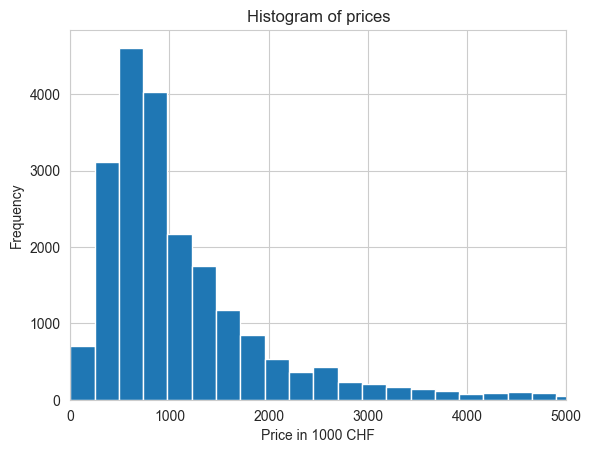

In [24]:
(df['price_cleaned']/1000).plot.hist(bins=200)
plt.xlabel('Price in 1000 CHF')
plt.ylabel('Frequency')
plt.title('Histogram of prices')
plt.xlim(0, 5000)
plt.show()

In [26]:
# show list of all columns ordered by price_cleaned asending
df = df.sort_values(by='price_cleaned', ascending=True)
df

,Unnamed: 0.1,Unnamed: 0,Municipality,Living space,Plot area,Floor space,Availability,location,description,detailed_description,...,features,description_detailed,Floor space:,Number of floors:,Volume:,plz,Number of toilets:,Gross yield:,Minimum floor space:,space_cleaned
10690,10690,10713,Etoy,NaN,NaN,NaN,On request,"1163 Etoy, VD",«a vendre une maison villageoise sur la Côte»C...,DescriptionA vendre une maison villageoise sit...,...,NaN,NaN,NaN,NaN,NaN,1163.0,NaN,NaN,NaN,NaN
3906,3906,3929,Veyrier,140 m²,NaN,NaN,31.12.2022,"1255 Veyrier, GE","7 rooms, 140 m²«Villa a vendre 7 pieces a Veyr...",DescriptionJolie maison familliale comprenant ...,...,NaN,NaN,NaN,NaN,NaN,1255.0,NaN,NaN,NaN,NaN
17882,17882,20516,Ovronnaz,NaN,NaN,NaN,NaN,"Ch de la Coppe, 1911 Ovronnaz","Chaleureux, douillets, élégants, les tout dern...","Description\n""Investissez en secondaire! Belle...",...,Balcony / Terrace\tCable TV\tFireplace\tWheelc...,"Description\n""Investissez en secondaire! Belle...",88 m2,NaN,NaN,1911.0,NaN,NaN,NaN,68.0
5021,5021,5044,Le Locle,45 m²,NaN,NaN,On request,"2400 Le Locle, NE","2 rooms, 45 m²«IDEAL POUR ETUDIANT !»CHF 745.—...","DescriptionIdéalement situé, cet appartement d...",...,NaN,NaN,NaN,NaN,NaN,2400.0,NaN,NaN,NaN,NaN
20194,20194,25560,Le Locle,NaN,NaN,NaN,NaN,2400 Le Locle,"Idéalement situé, cet appartement de 2 pièces ...","Description\n""IDEAL POUR ETUDIANT !""\nIdéaleme...",...,Wheelchair access\tElevator,"Description\n""IDEAL POUR ETUDIANT !""\nIdéaleme...",NaN,NaN,NaN,2400.0,NaN,NaN,NaN,45.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16848,16848,18758,Montreux,NaN,NaN,NaN,NaN,1820 Montreux,"Face au Lac, située à proximité du Centre-Vill...","Description\n""Somptueuse Maison de Maître avec...",...,Balcony / Terrace\tView\tParking space\tGarage...,"Description\n""Somptueuse Maison de Maître avec...",NaN,NaN,NaN,1820.0,NaN,NaN,NaN,782.0
11005,11005,11028,NaN,NaN,NaN,NaN,NaN,"1295 Tannay, VD","14 rooms, 1200 m²«Splendide propriété pied dan...",BeschreibungNous vous présentons cette superbe...,...,NaN,NaN,NaN,NaN,NaN,1295.0,NaN,NaN,NaN,NaN
13958,13958,14292,Buchillon,NaN,NaN,NaN,NaN,1164 Buchillon,"Située au bord du Lac Léman, entre Lausanne et...","Description\n""UNIQUE, villa ultra moderne pied...",...,Balcony / Terrace\tFireplace\tView\tWheelchair...,"Description\n""UNIQUE, villa ultra moderne pied...",NaN,2.0,NaN,1164.0,NaN,NaN,NaN,900.0
10657,10657,10680,Saint-Prex,NaN,5000 m²,NaN,On request,"1162 St-Prex, VD",10 rooms«Somptueuse propriété pieds dans l eau...,DescriptionCette propriété de maître ####pieds...,...,NaN,NaN,NaN,NaN,NaN,1162.0,NaN,NaN,NaN,NaN


In [33]:
import pandas as pd

def compare_columns_percentage(df):
    # Erstelle ein leeres Dictionary, um die Übereinstimmung zu speichern
    similarity_info = {}
    
    # Vergleiche jede Spalte mit jeder anderen Spalte
    for col1 in df.columns:
        for col2 in df.columns:
            if col1 != col2:  # Vermeide den Vergleich einer Spalte mit sich selbst
                # Vergleiche die Werte in jeder Zeile
                matching_rows = df[col1] == df[col2]
                matching_percentage = (matching_rows.sum() / len(df)) * 100  # Prozentuale Übereinstimmung
                
                # Speichere die Informationen nur, wenn es eine Übereinstimmung gibt
                if matching_percentage > 0:
                    similarity_info[(col1, col2)] = matching_percentage
    
    # Erstelle ein DataFrame aus dem Dictionary, um die Ergebnisse anzuzeigen
    similarity_df = pd.DataFrame.from_dict(similarity_info, orient='index', columns=['Percentage'])
    similarity_df.index = pd.MultiIndex.from_tuples(similarity_df.index, names=["Column 1", "Column 2"])
    
    # Sortiere die Ergebnisse nach der höchsten Übereinstimmung
    similarity_df = similarity_df.sort_values(by="Percentage", ascending=False)
    
    return similarity_df

# Beispiel-Aufruf mit deinem DataFrame (df)
similarity_df = compare_columns_percentage(df)
# Display the results
print(similarity_df)


                                                                       Percentage
Column 1                           Column 2                                      
plz                                plz_parsed                           98.663002
plz_parsed                         plz                                  98.663002
Living_area_unified                Space extracted                      93.939253
Space extracted                    Living_area_unified                  93.939253
RiversAndLakesS                    NoisePollutionRailwayS               80.462126
...                                                                           ...
Grundstücksfläche                  Floor_space_merged                    0.004659
detail_responsive#surface_property detail_responsive#surface_usable      0.004659
detail_responsive#surface_usable   detail_responsive#surface_property    0.004659
Year built:                        gde_private_apartments                0.004659
                

In [34]:
similarity_df

,,Percentage
Column 1,Column 2,
plz,plz_parsed,98.663002
plz_parsed,plz,98.663002
Living_area_unified,Space extracted,93.939253
Space extracted,Living_area_unified,93.939253
RiversAndLakesS,NoisePollutionRailwayS,80.462126
...,...,...
Grundstücksfläche,Floor_space_merged,0.004659
detail_responsive#surface_property,detail_responsive#surface_usable,0.004659
detail_responsive#surface_usable,detail_responsive#surface_property,0.004659


In [43]:
#df_droped_columns = df.drop(columns=['Unnamed: 0', 'plz', 'Living_area_unified', 'type', 'Availability', 'Municipality', 'Living space', 'Living_space_merged', 'address_s', 'location', 'space_cleaned', 'description', 'detailed_description', 'url', 'table', 'detail_responsive#municipality', 'detail_responsive#surface_living', 'detail_responsive#floor', 'detail_responsive#available_from', 'Minimum floor space:', 'Superficie utile', 'Gross return', 'Piano', 'Superficie del terreno', 'Surface utile', 'Gross yield:', 'Étage', 'Surface du terrain', 'Superficie abitabile', 'Comune', 'Disponibilità', 'Nutzfläche'])

In [48]:
columns_to_drop = count_column[count_column['missing [%]'] > 50].index
columns_to_drop

Index(['Minimum floor space:', 'Superficie utile', 'Gross return', 'Piano',
       'Superficie del terreno', 'Surface utile', 'Gross yield:', 'Étage',
       'Surface du terrain', 'Superficie abitabile', 'Comune', 'Disponibilità',
       'Nutzfläche', 'Grundstücksfläche', 'Surface habitable', 'Stockwerk',
       'Commune', 'Disponibilité', 'Number of toilets:',
       'detail_responsive#surface_usable', 'Wohnfläche', 'Gemeinde',
       'detail_responsive#surface_property', 'Verfügbarkeit',
       'detail_responsive#floor', 'Room height:',
       'detail_responsive#surface_living', 'detail_responsive#municipality',
       'detail_responsive#available_from', 'Number of apartments:', 'Volume:',
       'Last refurbishment:', 'Number of floors:', 'Floor space:',
       'Floor space', 'Floor_space_merged', 'Land area:', 'Plot area',
       'Plot_area_merged', 'Floor_unified', 'Floor_merged', 'Year built:',
       'Plot_area_unified', 'features', 'No. of rooms:',
       'description_detailed'

In [49]:
df_droped_columns = df.drop(columns=columns_to_drop)
df_droped_columns

,Unnamed: 0.1,Unnamed: 0,Municipality,Living space,Availability,location,description,detailed_description,url,table,...,gde_workers_total,price_cleaned,type,Space extracted,rooms,plz_parsed,type_unified,Living_area_unified,provider,plz
10690,10690,10713,Etoy,NaN,On request,"1163 Etoy, VD",«a vendre une maison villageoise sur la Côte»C...,DescriptionA vendre une maison villageoise sit...,https://www.immoscout24.ch//en/d/terrace-house...,b <article class=####Box-cYFBPY hKrxoH####><h2...,...,2734.0,1.0,terrace-house,NaN,NaN,1163.0,terrace-house,NaN,Immoscout24.ch,1163.0
3906,3906,3929,Veyrier,140 m²,31.12.2022,"1255 Veyrier, GE","7 rooms, 140 m²«Villa a vendre 7 pieces a Veyr...",DescriptionJolie maison familliale comprenant ...,https://www.immoscout24.ch//en/d/detached-hous...,b <article class=####Box-cYFBPY hKrxoH####><h2...,...,2105.0,2.0,detached-house,140.0,7.0,1255.0,detached-house,140.0,Immoscout24.ch,1255.0
17882,17882,20516,Ovronnaz,NaN,NaN,"Ch de la Coppe, 1911 Ovronnaz","Chaleureux, douillets, élégants, les tout dern...","Description\n""Investissez en secondaire! Belle...",https://www.homegate.ch/buy/3000094943,NaN,...,1480.0,550.0,Apartment,68.0,3.5rm,1911.0,flat,68.0,homegate.ch,1911.0
5021,5021,5044,Le Locle,45 m²,On request,"2400 Le Locle, NE","2 rooms, 45 m²«IDEAL POUR ETUDIANT !»CHF 745.—...","DescriptionIdéalement situé, cet appartement d...",https://www.immoscout24.ch//en/d/flat-buy-le-l...,b <article class=####Box-cYFBPY hKrxoH####><h2...,...,8266.0,745.0,flat,45.0,2.0,2400.0,flat,45.0,Immoscout24.ch,2400.0
20194,20194,25560,Le Locle,NaN,NaN,2400 Le Locle,"Idéalement situé, cet appartement de 2 pièces ...","Description\n""IDEAL POUR ETUDIANT !""\nIdéaleme...",https://www.homegate.ch/buy/3002040063,NaN,...,8266.0,745.0,Apartment,45.0,2rm,2400.0,flat,45.0,homegate.ch,2400.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16848,16848,18758,Montreux,NaN,NaN,1820 Montreux,"Face au Lac, située à proximité du Centre-Vill...","Description\n""Somptueuse Maison de Maître avec...",https://www.homegate.ch/buy/3002011511,NaN,...,12380.0,26000000.0,Single house,782.0,20rm,1820.0,detached-house,782.0,homegate.ch,1820.0
11005,11005,11028,NaN,NaN,NaN,"1295 Tannay, VD","14 rooms, 1200 m²«Splendide propriété pied dan...",BeschreibungNous vous présentons cette superbe...,https://www.immoscout24.ch//en/d/detached-hous...,b <article class=####Box-cYFBPY hKrxoH####><h2...,...,4157.0,30000000.0,detached-house,1200.0,4.0,1295.0,detached-house,1200.0,Immoscout24.ch,1295.0
13958,13958,14292,Buchillon,NaN,NaN,1164 Buchillon,"Située au bord du Lac Léman, entre Lausanne et...","Description\n""UNIQUE, villa ultra moderne pied...",https://www.homegate.ch/buy/3001777104,NaN,...,92.0,38000000.0,Single house,900.0,20rm,1164.0,detached-house,900.0,homegate.ch,1164.0
10657,10657,10680,Saint-Prex,NaN,On request,"1162 St-Prex, VD",10 rooms«Somptueuse propriété pieds dans l eau...,DescriptionCette propriété de maître ####pieds...,https://www.immoscout24.ch//en/d/detached-hous...,b <article class=####Box-cYFBPY hKrxoH####><h2...,...,2734.0,45000000.0,detached-house,NaN,0.0,1162.0,detached-house,NaN,Immoscout24.ch,1162.0


Index(['Unnamed: 0.1', 'Unnamed: 0', 'Municipality', 'Living space',
       'Plot area', 'Floor space', 'Availability', 'location', 'description',
       'detailed_description',
       ...
       'features', 'description_detailed', 'Floor space:', 'Number of floors:',
       'Volume:', 'plz', 'Number of toilets:', 'Gross yield:',
       'Minimum floor space:', 'space_cleaned'],
      dtype='object', length=134)


# Analyse der Wohnungsdaten
## Flächenattribute

In [52]:
columns_wohnung_attr = ['type'
                        , 'type_unified'
                        , 'rooms'
                        , 'Space extracted'
                        , 'Living_area_unified'
                        , 'Availability_merged'
                        , 'Availability'
                        , 'Living_space_merged'
                        , 'Living space'
                        , 'Floor'
                        , 'address_s'
                        , 'space'
                        , 'space_cleaned'
                        , 'Surface living:'
                        , 'No. of rooms:'
                        , 'Plot_area_unified'
                        , 'Year built:'
                        , 'Floor space'
                        , 'Floor_space_merged'
                        , 'Land area:'
                        , 'Plot area'
                        , 'Plot_area_merged'
                        , 'Floor_unified'
                        , 'Floor_merged'
                        , 'detail_responsive#floor'
                        , 'Room height:'
                        , 'detail_responsive#surface_living'
                        , 'detail_responsive#municipality'
                        , 'detail_responsive#available_from'
                        , 'Number of apartments:'
                        , 'Volume:'
                        , 'Last refurbishment:'
                        , 'Number of floors:'
                        , 'Floor space:'
                        , 'Surface habitable'
                        , 'Stockwerk'
                        , 'Disponibilité'
                        , 'Number of toilets:'
                        , 'detail_responsive#surface_usable'
                        , 'Wohnfläche'
                        , 'detail_responsive#surface_property'
                        , 'Verfügbarkeit'
                        , 'Superficie del terreno'
                        , 'Surface utile'
                        , 'Étage'
                        , 'Surface du terrain'
                        , 'Superficie abitabile'
                        , 'Disponibilità'
                        , 'Nutzfläche'
                        , 'Grundstücksfläche'
                        , 'Minimum floor space:'
                        , 'Superficie utile'
                        , 'Piano'
                        ]
df_wohung_flächenattr = df[columns_wohnung_attr]
df_wohung_flächenattr

,type,type_unified,rooms,Space extracted,Living_area_unified,Availability_merged,Availability,Living_space_merged,Living space,Floor,...,Surface utile,Étage,Surface du terrain,Superficie abitabile,Disponibilità,Nutzfläche,Grundstücksfläche,Minimum floor space:,Superficie utile,Piano
10690,terrace-house,terrace-house,NaN,NaN,NaN,On request,On request,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3906,detached-house,detached-house,7.0,140.0,140.0,31.12.2022,31.12.2022,140 m²,140 m²,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17882,Apartment,flat,3.5rm,68.0,68.0,NaN,NaN,NaN,NaN,GF,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5021,flat,flat,2.0,45.0,45.0,On request,On request,45 m²,45 m²,8. floor,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20194,Apartment,flat,2rm,45.0,45.0,NaN,NaN,NaN,NaN,8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16848,Single house,detached-house,20rm,782.0,782.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11005,detached-house,detached-house,4.0,1200.0,1200.0,On request,NaN,1200 m²,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,8071 m²,NaN,NaN,NaN
13958,Single house,detached-house,20rm,900.0,900.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10657,detached-house,detached-house,0.0,NaN,NaN,On request,On request,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [55]:
# count nan values per column
nans_wohnung = df_wohung_flächenattr.isna().sum()
nans_wohnung

type                                      0
type_unified                              0
rooms                                   697
Space extracted                        1301
Living_area_unified                    1301
Availability_merged                    9552
Availability                           9784
Living_space_merged                   10427
Living space                          10649
Floor                                 11770
address_s                             12340
space                                 12340
space_cleaned                         12340
Surface living:                       12340
No. of rooms:                         12598
Plot_area_unified                     13991
Year built:                           14533
Floor space                           18853
Floor_space_merged                    18796
Land area:                            18197
Plot area                             17260
Plot_area_merged                      17171
Floor_unified                   

In [57]:
columns_duplicated_space_attr = [
                        'Space extracted'
                        , 'Living_area_unified'
                        , 'Living_space_merged'
                        , 'Living space'
                        , 'space'
                        , 'space_cleaned'
                        , 'Surface living:'
                        , 'Plot_area_unified'
                        , 'Floor space'
                        , 'Floor_space_merged'
                        , 'Land area:'
                        , 'Plot area'
                        , 'Plot_area_merged'
                        , 'detail_responsive#surface_living'
                        , 'Volume:'
                        , 'Floor space:'
                        , 'Surface habitable'
                        , 'detail_responsive#surface_usable'
                        , 'Wohnfläche'
                        , 'detail_responsive#surface_property'
                        , 'Superficie del terreno'
                        , 'Surface utile'
                        , 'Surface du terrain'
                        , 'Superficie abitabile'
                        , 'Nutzfläche'
                        , 'Grundstücksfläche'
                        , 'Minimum floor space:'
                        , 'Superficie utile'
]
df_wohung_flächenattr = df[columns_duplicated_space_attr]
df_wohung_flächenattr

,Space extracted,Living_area_unified,Living_space_merged,Living space,space,space_cleaned,Surface living:,Plot_area_unified,Floor space,Floor_space_merged,...,Wohnfläche,detail_responsive#surface_property,Superficie del terreno,Surface utile,Surface du terrain,Superficie abitabile,Nutzfläche,Grundstücksfläche,Minimum floor space:,Superficie utile
10690,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3906,140.0,140.0,140 m²,140 m²,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17882,68.0,68.0,NaN,NaN,68m2,68.0,68 m2,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5021,45.0,45.0,45 m²,45 m²,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20194,45.0,45.0,NaN,NaN,45m2,45.0,45 m2,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16848,782.0,782.0,NaN,NaN,782m2,782.0,782 m2,4713.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11005,1200.0,1200.0,1200 m²,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1200 m²,NaN,NaN,NaN,NaN,NaN,NaN,8071 m²,NaN,NaN
13958,900.0,900.0,NaN,NaN,900m2,900.0,900 m2,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10657,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5000.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [58]:
nans_wohnung = df_wohung_flächenattr.isna().sum()
nans_wohnung

Space extracted                        1301
Living_area_unified                    1301
Living_space_merged                   10427
Living space                          10649
space                                 12340
space_cleaned                         12340
Surface living:                       12340
Plot_area_unified                     13991
Floor space                           18853
Floor_space_merged                    18796
Land area:                            18197
Plot area                             17260
Plot_area_merged                      17171
detail_responsive#surface_living      21068
Volume:                               19934
Floor space:                          18706
Surface habitable                     21405
detail_responsive#surface_usable      21362
Wohnfläche                            21331
detail_responsive#surface_property    21325
Superficie del terreno                21456
Surface utile                         21453
Surface du terrain              